# Python Assignment 2

⏱⏱⏱**Due: 10/15/2023 11:59 PM** ⏱⏱⏱

Please submit your notebook files and upload them to your Git repository. Don't forget to include a link to your Git repository when submitting this file on Brightspace.

Collaboration is permitted and encouraged; however, it's essential to independently produce and submit your own work. If you collaborate with others, please ensure that you provide their names in the designated section.

Collaborators:_____

(150 points total)

I have provided some guidance in comments to help you through the steps, but feel free to approach this in a different way if you prefer. **Feel free to disregard my comments if you have an alternative approach in mind.**

## 1. Good presentation of your code and outputs; submitting your files to Github (10 pts)

Ensure thorough and clear comments within your code to explain its functionality.

Enhance your plots by adding titles, legends, and axis labels where appropriate to provide clarity.

If necessary, employ LaTex notation to present mathematical explanations within the notebook.

Divide your code into multiple blocks or cells in Jupyter Notebook and provide descriptive explanations for each block to improve readability.

As part of your submission, include the notebook files and upload them to your Git repository. Additionally, remember to provide a link to your Git repository when submitting the files on Brightspace.

Please adhere to the constraint of using only the `numpy`, `scipy`, and `matplotlib` libraries for this assignment, as it is feasible to complete the task without introducing additional libraries or packages.



## 2. Implementing Gradient Descent Algorithm (60 pts)

Given a function $f(x) = \sqrt{x^2+5}$, $x\in \mathbf{R}$.

Fact: This function is L-smooth.
0. Find the gradient of this function and the minimum value of this function analytically.


1. Plot this function over the interval $[-5, 5]$.
2. Perform the Gradient Descent algorithm to find the minimum value of $f$ for $50$ iterations ($T$) with a step size of $1$ ($\alpha$). Use the last digit of your SB ID divided by 5 and then plus 1 as the initial guess (for example, if your ID ends with 9, your initial guess $x_0$ will be $9\div5 + 1= 2.8$).
3. Record the values of $x_k$ at the $k$-th iteration during GD and report $x_T$.
4. Plot the value of $f(x_k)$ v.s. the iteration number $k$.
5. For each of the step sizes 5, 3, 1, and 0.5, perform gradient descent and record the values of $x_k$ in each step $k$. Plot $f(x_{k-1}) - f(x_{k})$ v.s. $k$ for each step size. Your graphs should all be included in a single plot. Examine if $f(x_{k-1}) - f(x_{k})$ (which means that $f(x_k)$ is always decreasing) is alway positive for all $k$.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o1.png)
![o2](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o2.png)
![o3](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o3.png)

Please note that the graphs generated as output may not precisely match the ones I'm providing here. The disparities could be significant, as I'm presenting a general overview of the expected graph. I've adjusted certain parameters/plot information in the graph generation process to prevent disclosing the "answer/solution".&nbsp;


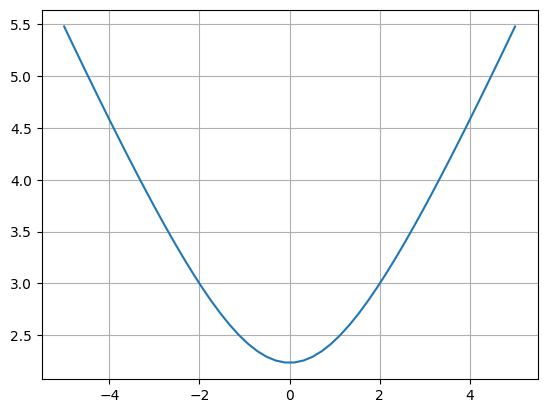

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x).
def func(x):
    return np.sqrt(x**2+5)

# Plot the function f(x), np.linspace might be helpful.
outputs = []
x = np.linspace(-5.0,5.0) # x from -5 to 5, y as calculated
plt.plot(x,func(x))
plt.grid()


3.291399714148593e-13


Text(0, 0.5, 'f(x_k)')

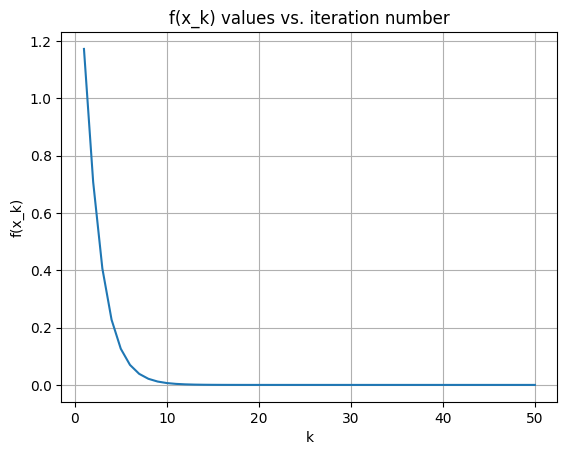

In [7]:
# Define the derivative of the function f(x), for gradient descent
def derf(x):
    return (x)/(np.sqrt(x**2+5))

# write a function to run the Gradient Descent Algorithm, take input arguments x_0, step_size, and num_iterations; return a list/array of x_k values.
def gradient(x_0, step_size, num_iterations):
    values = []
    i = 1
    while i <= num_iterations:
        s = (x_0) - (step_size)*( derf(x_0))
        values.append(s)
        i = i + 1
        x_0 = s 
    return values

# set up/assign initial values
x_0 = 1.8
step_size = 1
num_iterations = 50

# Run gradient descent by calling the function
Array = gradient(x_0,step_size,num_iterations)

# report x_T by printing out the value
print(Array[num_iterations-1])

# Plot the f(x_k) values vs. iteration number
plt.plot(range(1,51),Array)
plt.grid()
plt.title('f(x_k) values vs. iteration number')
plt.xlabel('k')
plt.ylabel('f(x_k)')


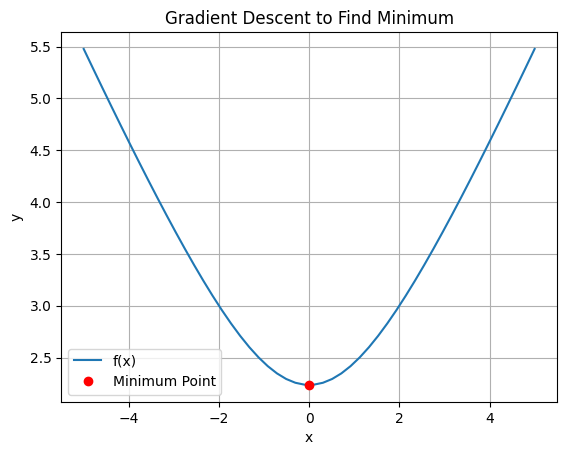

In [3]:
#Plotting with minimum value
x = np.linspace(-5.0,5.0)
plt.plot(x,func(x), label= 'f(x)')
plt.grid()
plt.title('Gradient Descent to Find Minimum')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(Array[num_iterations-1],func(Array[num_iterations-1]), 'ro', label= 'Minimum Point')
plt.legend()

Text(0, 0.5, 'f(x_k-1) - f(x_k)')

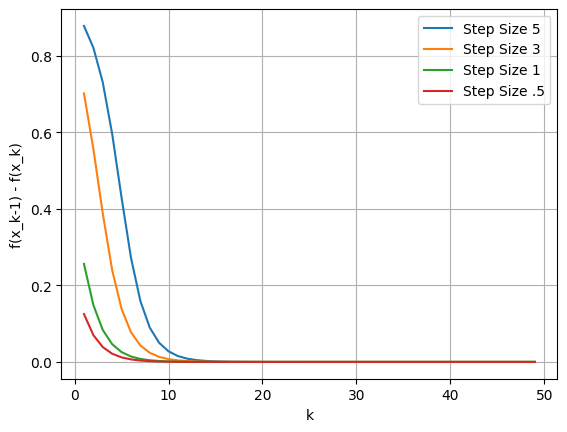

In [10]:
# Plots of all step sizes
# Each step size has it's own block and stores into it's respective array.

ArrayStep5 = gradient(5,step_size,num_iterations)
Diffs5=[]
i=0
while i <49:
    Diffs5.append(ArrayStep5[i] - ArrayStep5[i+1])
    i = i + 1


ArrayStep3 = gradient(3,step_size,num_iterations)
Diffs3=[]
i=0
while i <49:
    Diffs3.append(ArrayStep3[i] - ArrayStep3[i+1])
    i = i + 1



ArrayStep1 = gradient(1,step_size,num_iterations)
Diffs1=[]
i=0
while i <49:
    Diffs1.append(ArrayStep1[i] - ArrayStep1[i+1])
    i = i + 1


ArrayStepHalf = gradient(0.5,step_size,num_iterations)
Diffshalf=[]
i=0
while i <49:
    Diffshalf.append(ArrayStepHalf[i] - ArrayStepHalf[i+1])
    i = i + 1


plt.plot(range(1,50),Diffs5, label= 'Step Size 5')
plt.plot(range(1,50),Diffs3, label= 'Step Size 3')
plt.plot(range(1,50),Diffs1, label= 'Step Size 1')
plt.plot(range(1,50),Diffshalf, label= 'Step Size .5')
plt.grid()
plt.legend()
plt.xlabel('k')
plt.ylabel('f(x_k-1) - f(x_k)')

## 3. Linear Regression with Numpy and Graphing with Matplotlib (30 pts)

In class, we implemented a linear regression model with one-dimensional features ( $x$-values). However, below, you will find the code for generating synthetic data where the features ( $x$-values) are now two-dimensional.

**Change the random seed to be the last two digits of your student ID. For example, if your ID is 123456987, change the random seed to be 87.**

The next step involves performing linear regression on this newly generated data. We will employ the normal equation, a topic covered in class, to determine the coefficients and intercept (weights and bias).

**Report the parameter values and plot the generated data and the regression plane (in 1D, we have a line, but in 2D, we have a plane).** `numpy.linspace`, `numpy.meshgrid`, and [Surface Plot](https://matplotlib.org/stable/gallery/mplot3d/surface3d.html) methods might be helpful in plotting the plane. You don't have to use them, it is just my suggestions.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o4.png)



[3.86127951 0.76690595 3.90432145]


' I am struggling with how to plot the regression plane. '

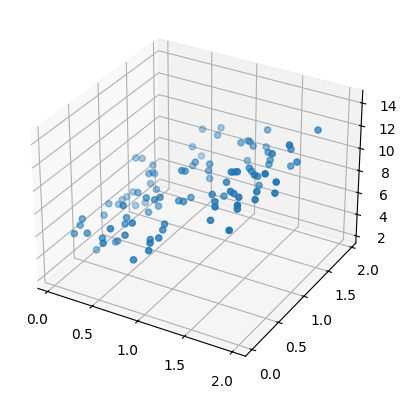

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Generate synthetic data
np.random.seed(94)   # change the seed to be the last two digits of your SB ID.
X = 2 * np.random.rand(100, 2)  # Generate 100 random 2D data points
Y = 4 + 4 * X[:, 0] + 0.5 * X[:, 1] + np.random.randn(100)  # Generate y values with noise


# Add a column of ones to X for the bias terms (intercept) in the normal equation
X_b = np.c_[X, np.ones((100, 1))]


# Find theta using the normal equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)
print(theta_best)

# Print the intercept and coefficients of the regression plane
w = theta_best[0]
b = theta_best[1]


# Plot the generated data and the regression plane
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0],X[:,1],Y, 'o')


''' I am struggling with how to plot the regression plane. '''



## 4. Logistic Regression with Numpy and Graphing with Matplotlib (20 pts)

In class, we implemented a logistic regression model to perform binary classification. Here, I provided the exact same code that we discussed in class, but the values for learning_rate and num_epochs are modified. I also removed all the comments. You task is to
1. Tune the Learning Rate and Number of Epochs: Your first task is to fine-tune the values for the learning_rate and num_epochs parameters. Your goal is to identify suitable values that will enable us to converge to a set of parameter values $\theta$ closely approximating the optimal parameter values $\theta^*$.
2. Code Explanation: To enhance code comprehension, please augment the code with meaningful comments. These comments should elucidate the purpose and functionality of each code segment, making it easier for readers to understand the logistic regression implementation.

By accomplishing these tasks, we aim to achieve a better understanding of the logistic regression model's behavior and its parameter optimization process.

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z): 
    '''
    Defines the sigmoid function, used for logistic regression
    '''
    return 1 / (1 + np.exp(-z))


np.random.seed(595)
X = np.random.rand(2, 100) # Generates 2 rows, each with 100 random entries between 0 and 1
w_true = np.array([1.5, -2.5]) # True weight vector
b_true = 1.0  # True bias

'''
probabilities are generated by the hypothesis function: Taking the matrix product of w_true and X, adding to it the true bias,
and then taking the sigmoid of each value, so the list 'probabilities' is a 1x100 list of values between 0 and 1,
as that is the sigmoid function's range. 

'''
probabilities = sigmoid(np.dot(w_true.T, X) + b_true) 


'''
Y is generated by looking at our probabilities, and comparing it with 0.5
if it is greater, it is assigned a 1, lower a 0. This is predicting which are class 1 or class 0.
'''
Y = (probabilities > 0.5).astype(int)

'''
Now we've gotten the true probabilities from out data set, we will add noise to X
and try to get the machine to retrieve the given relations, i.e., the weight and bias, 
and in turn, the probabilities. 
'''

X = X + 0.3 * np.random.rand(2, 100) - 0.1 * np.random.rand(2, 100) # Adds noise to X


'''
X_train takes the first 80 columns from X, and X_test takes the last 20 columns from X. 
Same for Y_train and Y_test.
'''

X_train, X_test = X[:,:80], X[:,80:]
Y_train, Y_test = Y[:80], Y[80:]


w = np.zeros(X.shape[0]) # Initializes the weight vector

b = 0.0 # Initializes the bias
learning_rate = 5.95 # Step size 
num_epochs = 595 # How many times the training set will be used to generate new parameters

'''
The following for statement evaluates the partial derivates of J and generates w and b after
iterating through the 595 epochs. 
A_train is the hypothesis function for our training sets
DJdw is partial derivative of the cost function wrt w
DJdb is partial derivative of the cost function wrt b
'''
for epoch in range(num_epochs):
    A_train = sigmoid(np.dot(w.T, X_train) + b)

    dJdw = np.dot(X_train, (A_train - Y_train).T) / len(Y_train)
    dJdb = np.mean(A_train - Y_train)

    w -= learning_rate * dJdw
    b -= learning_rate * dJdb


'''
Now, we have our estimated weight and bias, which is hopefully close to the true weight and bias!

Like before, we generate predictions based on the training set, and the same for the
test set. We then compare the training predictions to the original Y_train set and calculate the accuracy.
We then do the same for the test set vs Y_test.
'''
A_train = sigmoid(np.dot(w.T, X_train) + b)
predictions_train = (A_train > 0.5).astype(int)

A_test = sigmoid(np.dot(w.T, X_test) + b)
predictions_test = (A_test > 0.5).astype(int)

train_accuracy = np.mean(predictions_train == Y_train)

test_accuracy = np.mean(predictions_test == Y_test)

print(f"Training Set Accuracy: {train_accuracy:.2f}")
print(f"Test Set Accuracy: {test_accuracy:.2f}")

Training Set Accuracy: 0.89
Test Set Accuracy: 0.95


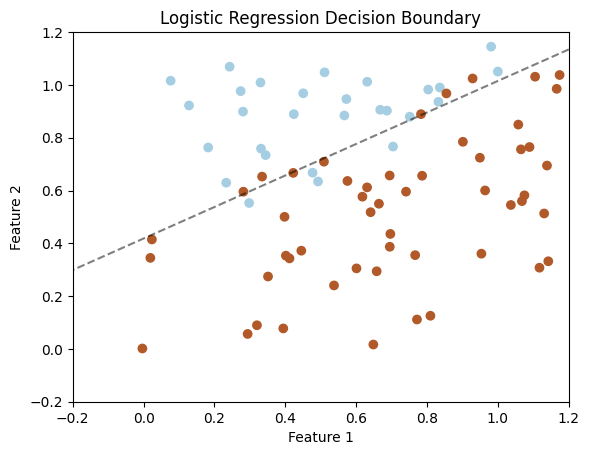

In [85]:
plt.scatter(X[0, :80], X[1,:80], c=Y[:80], cmap=plt.cm.Paired)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
ax = plt.gca()

xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b
Z = sigmoid(Z)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--'])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()

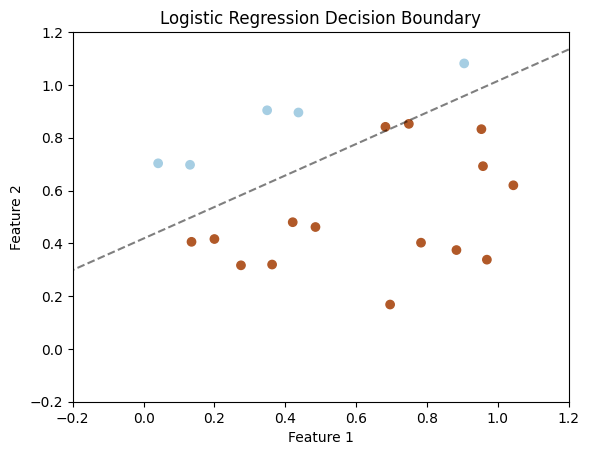

In [46]:
plt.scatter(X[0, 80:], X[1, 80:], c=Y[80:], cmap=plt.cm.Paired)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b
Z = sigmoid(Z)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--'])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()

## 5. Image Binary Classification (30 pts)



For Question 5 of the Python project, please complete it using two distinct Jupyter Notebook scripts. This entails using one notebook for the original dataset and another for the modified dataset. Consequently, you will be submitting a total of three .ipynb files as part of your Python project, ensuring clear separation and organization of your work.

Your tasks:
1. Your first task is to re-implement the classification model that was covered in our class. Please start from scratch and write the code independently. You can refer to the original code provided on Brightspace if you encounter any difficulties, but try to write the code on your own to reinforce your understanding.

2. After implementing the classification model, **report the indices of all the images in the test set for which the model's predictions are incorrect.** To maintain consistency with Python’s convention, please begin your indexing with 0. Additionally, **display the images of 4 of these failed cases for visual examination (you can display more if you like)**. This analysis might help us identify instances where the model is struggling in some applications.

3. Now you will modify the code to treat the dataset differently. The first 160 images plus the last digit of your Student ID will constitute the new training set, while the remaining images in the original training set will be your new test set. There are 209 images in the original training set. For example, if your ID ends with 0, the first 160 images will form your training set, and the remaining 49 images will be part of your test set. The test dataset is discarded and no longer used. Re-train the model using this modified dataset and **report the training and test accuracies**. Additionally, **provide the indices of all the images in the test set for which the model's predictions are incorrect. Display 4 of these misclassified images for further examination.**

By completing these tasks, you'll gain valuable insights into the classification model's performance and its behavior under different training and testing conditions.


 Download datasets: [train](https://drive.google.com/file/d/1I1_zbX9aqvl7FaRW1qR36R4PCL7awBlH/view?usp=drive_link), [test](https://drive.google.com/file/d/1nDk_E5crLPsmLKwq8iykS8s26Xerf_X0/view?usp=drive_link)